# Understanding Facebook Posts

In [84]:
import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [85]:
fb = pd.read_csv('data/dataset_Facebook.csv',sep=';')

In [86]:
# This dataset has 500 observations and 19 features.
fb.shape

(500, 19)

In [87]:
fb.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


I renamed the features because they had complex and long names. Now it's easier to call them for the different processes.

In [88]:
fb.columns = ['page_likes', 'type','category','month','weekday','hour','paid',
              'lt_reach','lt_impressions','lt_engaged','lt_consumers','lt_consumptions',
              'lt_imp|likes','lt_engaged|likes','lt_likes&engaged',
              'comments','likes','shares','interactions']

The first thing to do is respecting the Golden Rule of machine learning. I split the data first into training and test. I won't see the test data for anything in the project, not even for EDA.

In [89]:
fb_train,fb_test = train_test_split(fb,test_size=0.3)

In [90]:
fb_train.head()

,page_likes,type,category,month,weekday,hour,paid,lt_reach,lt_impressions,lt_engaged,lt_consumers,lt_consumptions,lt_imp|likes,lt_engaged|likes,lt_likes&engaged,comments,likes,shares,interactions
387,109670,Photo,1,4,3,13,1.0,5402,8891,700,633,1078,6733,3992,514,0,112.0,14.0,126
307,124940,Photo,3,6,3,3,1.0,4644,8178,768,683,1000,5651,3144,506,4,154.0,26.0,184
75,137893,Photo,1,11,3,2,1.0,37376,68610,1150,808,1341,22100,10880,724,20,411.0,74.0,505
208,132201,Photo,3,8,7,3,0.0,2594,4220,347,315,529,3418,2067,248,1,54.0,11.0,66
331,119198,Photo,3,5,3,5,0.0,4344,8025,692,626,872,4911,2528,367,1,107.0,26.0,134


(0, 1000)

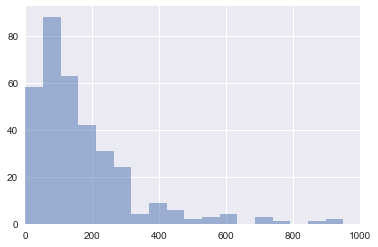

In [91]:
plt.hist(fb_train['interactions'],120,alpha=0.5)
plt.xlim(0,1000)

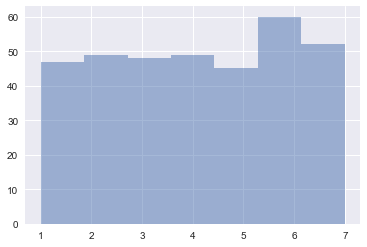

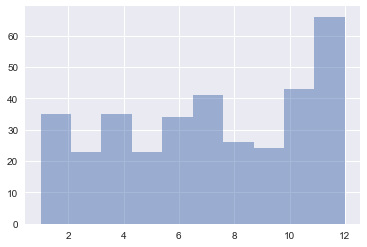

In [92]:
plt.hist(fb_train['weekday'],7,alpha=0.5)
plt.show()
plt.hist(fb_train['month'],alpha=0.5)
plt.show()

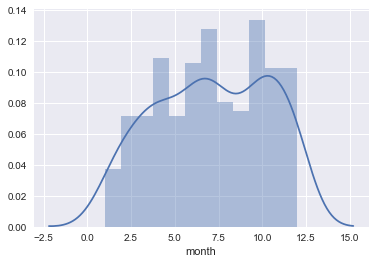

In [93]:
sns.distplot(fb_train['month'],12)
plt.show()

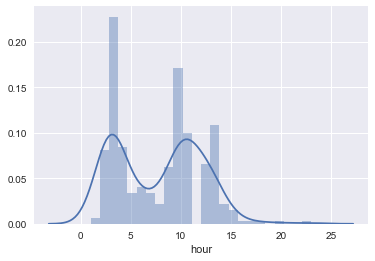

In [94]:
sns.distplot(fb_train['hour'],24)
plt.show()

(0, 1000)

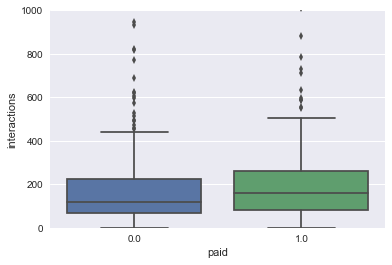

In [95]:
ax = sns.boxplot(x="paid", y="interactions", data=fb)
plt.ylim(0,1000)

(0, 1000)

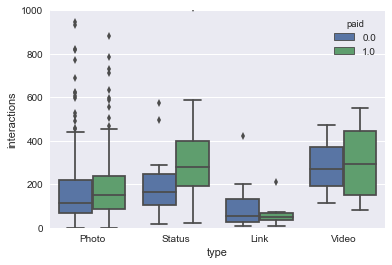

In [96]:
ax = sns.boxplot(x="type", y="interactions",hue="paid", data=fb)
plt.ylim(0,1000)

(0, 20)

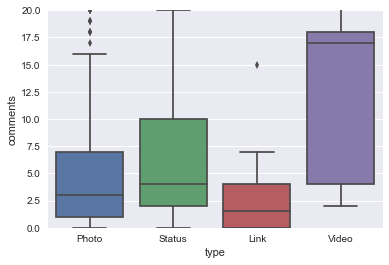

In [101]:
ax = sns.boxplot(x="type", y="comments", data=fb)
plt.ylim(0,20)

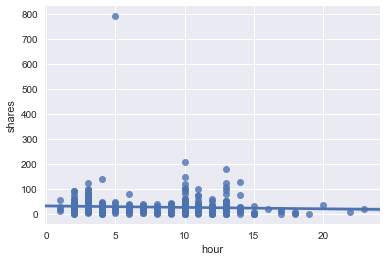

In [102]:
sns.regplot(x="hour", y="shares", data=fb)

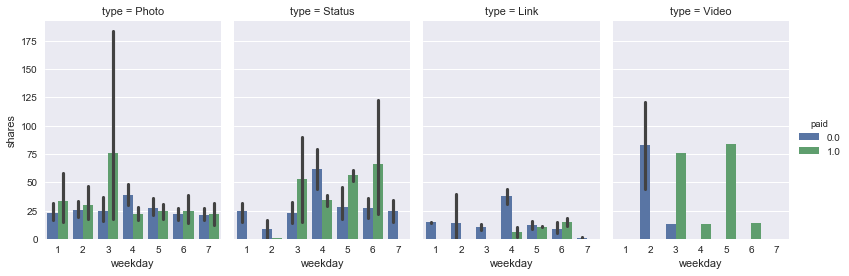

In [103]:
sns.factorplot(x="weekday", y="shares",hue="paid", col="type",data=fb, kind="bar",size=4, aspect=.7);

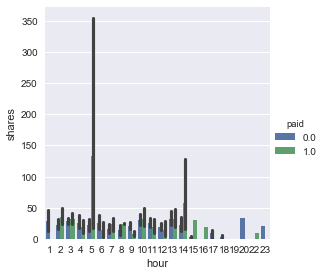

In [104]:
sns.factorplot(x="hour", y="shares",hue="paid",data=fb, kind="bar");

In [108]:
fb_train_y = fb_train[['comments','likes','shares','interactions']]

In [107]:
fb_train_x = fb_train[fb_train.columns.difference(['comments','likes','shares','interactions'])]